# Análise Airbnb

##Data Understanding

In [40]:
#Importanto as Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [41]:
#Lendo o arquivo Details
dfDetails = pd.read_csv('https://raw.githubusercontent.com/StephannieCarvalho/analise_airbnb/main/desafio_details.csv',delimiter= ",")


In [42]:
#Lendo o arquivo Price 
dfPrice = pd.read_csv('https://raw.githubusercontent.com/StephannieCarvalho/analise_airbnb/main/desafio_priceav.csv',delimiter= ",")


In [43]:
#Visualizando o DF
dfDetails.head()

,Unnamed: 0,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0
1,1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0
2,2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0
3,3,22343656,Ingleses,06- Apartamento 02 habitaciones,2.0,1.0,5.0,True,28.0
4,4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0


In [44]:
#Verificando se as variáveis estão do tipo corretos

dfDetails.dtypes

Unnamed: 0               int64
airbnb_listing_id        int64
suburb                  object
ad_name                 object
number_of_bedrooms     float64
number_of_bathrooms    float64
star_rating            float64
is_superhost              bool
number_of_reviews      float64
dtype: object

In [45]:
#Verificando os nulos

dfDetails.isnull().sum()

Unnamed: 0                0
airbnb_listing_id         0
suburb                    0
ad_name                   0
number_of_bedrooms      183
number_of_bathrooms       1
star_rating            2121
is_superhost              0
number_of_reviews         7
dtype: int64

In [46]:
#Verifi}cando os dados do price
dfPrice.head()

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
0,0,2148,40201349,blank,2020-11-15,250.0,0
1,1,2159,40201349,blank,2020-11-26,250.0,0
2,2,2160,40201349,blank,2020-11-27,250.0,0
3,3,2173,40201349,blank,2020-12-10,250.0,0
4,4,2226,40201349,blank,2021-02-01,250.0,0


In [47]:
#Verificação de Nulos
dfPrice.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1         0
airbnb_listing_id    0
booked_on            0
date                 0
price_string         0
occupied             0
dtype: int64

In [48]:
#Verificando os tipos das variáveis
dfPrice.dtypes

Unnamed: 0             int64
Unnamed: 0.1           int64
airbnb_listing_id      int64
booked_on             object
date                  object
price_string         float64
occupied               int64
dtype: object

In [49]:
dfPrice['date'] = pd.to_datetime(dfPrice['date'])



In [50]:
dfPrice.dtypes

Unnamed: 0                    int64
Unnamed: 0.1                  int64
airbnb_listing_id             int64
booked_on                    object
date                 datetime64[ns]
price_string                float64
occupied                      int64
dtype: object

##Ordene os bairros em ordem crescente de número de listings.

In [51]:
#Ordene os bairros em ordem crescente de número de listings
dfDetails['suburb'].value_counts()

Ingleses              2388
Canasvieiras          1177
Jurerê                 539
Lagoa da Conceição     309
Centro                 278
Name: suburb, dtype: int64

Text(0.5, 0, 'suburb')

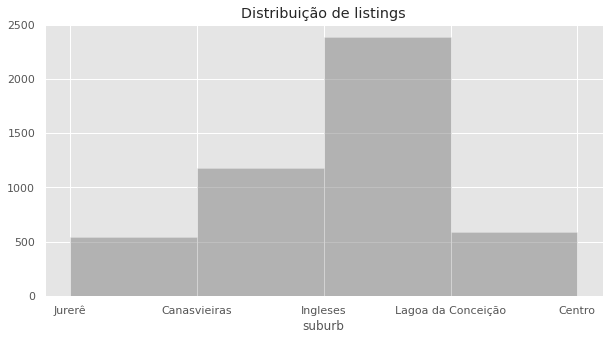

In [52]:
#Gráfico de distribuição de listings por região
plt.style.use("ggplot")
plt.figure(figsize = (10, 5))
grafico1 = dfDetails["suburb"].hist(bins = 4, alpha = .5, color = "gray")
plt.title("Distribuição de listings")
plt.xlabel("suburb")


##Ordene os bairros em ordem crescente de faturamento médio dos listings.

In [53]:
#Juntando os DataFrames
df_fr = dfPrice.drop(dfPrice.columns[[0, 1]], axis=1)
df_fr = pd.merge(dfPrice, dfDetails, left_on="airbnb_listing_id", right_on="airbnb_listing_id", how="left")
df_fr.head()

,Unnamed: 0_x,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied,Unnamed: 0_y,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,0,2148,40201349,blank,2020-11-15,250.0,0,349,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
1,1,2159,40201349,blank,2020-11-26,250.0,0,349,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
2,2,2160,40201349,blank,2020-11-27,250.0,0,349,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
3,3,2173,40201349,blank,2020-12-10,250.0,0,349,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
4,4,2226,40201349,blank,2021-02-01,250.0,0,349,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0


In [54]:
#Escolhendo apenas datas que o anuncio esteja ocupado
df_datasalugadas = df_fr.loc[df_fr.occupied == 1]
df_datasalugadas.head()

,Unnamed: 0_x,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied,Unnamed: 0_y,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
12,12,6452,40206270,2021-01-01 00:00:00,2021-01-01,380.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0
13,13,6453,40206270,2021-01-01 00:00:00,2021-01-02,380.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0
52,52,6492,40206270,2021-02-10 00:00:00,2021-02-10,195.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0
53,53,6493,40206270,2021-02-10 00:00:00,2021-02-11,350.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0
54,54,6494,40206270,2021-02-10 00:00:00,2021-02-12,350.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0


In [55]:
#Faturamento médio calculado pelor todo o faturamento da região dividido pela quantidade de vezes que esteve ocupado algum anuncio da região
df_agg = df_datasalugadas.groupby("suburb").agg({
    'price_string': 'sum',
    'airbnb_listing_id': 'count'
})
df_agg['faturamento_medio'] = df_agg['price_string']/df_agg['airbnb_listing_id']
df_agg.head()

,price_string,airbnb_listing_id,faturamento_medio
suburb,,,
Canasvieiras,10682106.0,36553,292.236096
Centro,1591225.0,7691,206.894422
Ingleses,24263645.0,68313,355.183420
Jurerê,7757805.0,18735,414.080865
Lagoa da Conceição,2160116.0,9216,234.387587


In [56]:
#Ordenando em ordem decrescente, do maior faturamento médio, ao menor. 
print(df_agg.sort_values(by=['faturamento_medio'], ascending=False))

                    price_string  airbnb_listing_id  faturamento_medio
suburb                                                                
Jurerê                 7757805.0              18735         414.080865
Ingleses              24263645.0              68313         355.183420
Canasvieiras          10682106.0              36553         292.236096
Lagoa da Conceição     2160116.0               9216         234.387587
Centro                 1591225.0               7691         206.894422


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Faturamento Médio por Região')

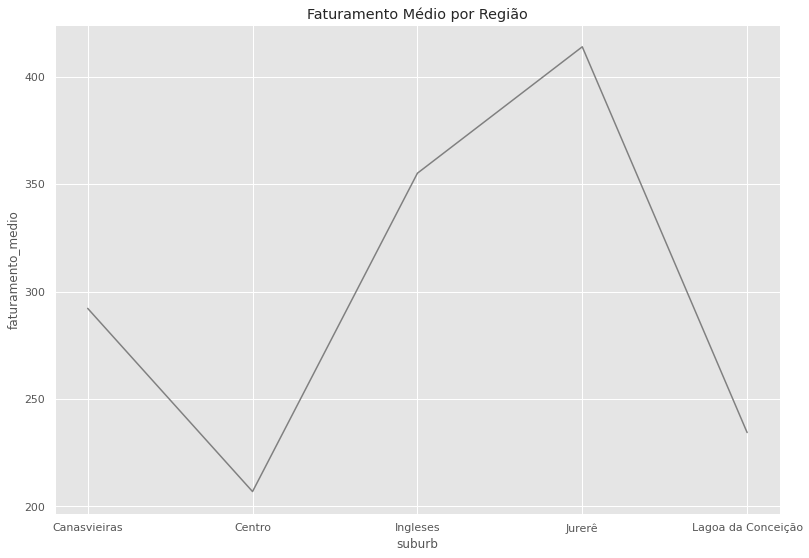

In [57]:
#Gráfico 2: faturamento médio por região 
grafico2 = sns.lineplot('suburb', 'faturamento_medio', data=df_agg, color="grey")
grafico2.set_title("Faturamento Médio por Região")

##Correlações entre as características de um anúncio e seu faturamento.
a. Quais? Explique


In [58]:
#faturamento por anuncio e caracteristicas
df_3 = df_datasalugadas.groupby("airbnb_listing_id").agg({
    'airbnb_listing_id':['count'],
    'price_string': ['sum'],
    'suburb' : ['count'],
    'number_of_bedrooms':['sum'],
    'number_of_bathrooms':['sum'],
    'star_rating':['mean'],
    'ad_name':['count']
    
})
df_3.head()


,airbnb_listing_id,price_string,suburb,number_of_bedrooms,number_of_bathrooms,star_rating,ad_name
,count,sum,count,sum,sum,mean,count
airbnb_listing_id,,,,,,,
108658,60,22300.0,60,120.0,120.0,NaN,60
128631,44,28000.0,44,176.0,88.0,NaN,44
279586,13,3190.0,13,39.0,26.0,4.5,13
317970,10,6224.0,10,30.0,20.0,4.5,10
333619,150,24152.0,150,150.0,150.0,5.0,150


In [59]:
df_3.columns = ['.'.join(col).strip() if col[1] != "" else col[0] for col in df_3.columns.values]
df_3.head()

,airbnb_listing_id.count,price_string.sum,suburb.count,number_of_bedrooms.sum,number_of_bathrooms.sum,star_rating.mean,ad_name.count
airbnb_listing_id,,,,,,,
108658,60,22300.0,60,120.0,120.0,NaN,60
128631,44,28000.0,44,176.0,88.0,NaN,44
279586,13,3190.0,13,39.0,26.0,4.5,13
317970,10,6224.0,10,30.0,20.0,4.5,10
333619,150,24152.0,150,150.0,150.0,5.0,150


In [60]:
#Estabelecendo correlações
df_3.corr()

,airbnb_listing_id.count,price_string.sum,suburb.count,number_of_bedrooms.sum,number_of_bathrooms.sum,star_rating.mean,ad_name.count
airbnb_listing_id.count,1.000000,0.759284,1.000000,0.744103,0.814469,0.037124,1.000000
price_string.sum,0.759284,1.000000,0.759284,0.789122,0.800171,0.068390,0.759284
suburb.count,1.000000,0.759284,1.000000,0.744103,0.814469,0.037124,1.000000
number_of_bedrooms.sum,0.744103,0.789122,0.744103,1.000000,0.892898,0.034305,0.744103
number_of_bathrooms.sum,0.814469,0.800171,0.814469,0.892898,1.000000,0.042260,0.814469
star_rating.mean,0.037124,0.068390,0.037124,0.034305,0.042260,1.000000,0.037124
ad_name.count,1.000000,0.759284,1.000000,0.744103,0.814469,0.037124,1.000000


Text(0.5, 1.0, 'Correlação entre Preço e Região')

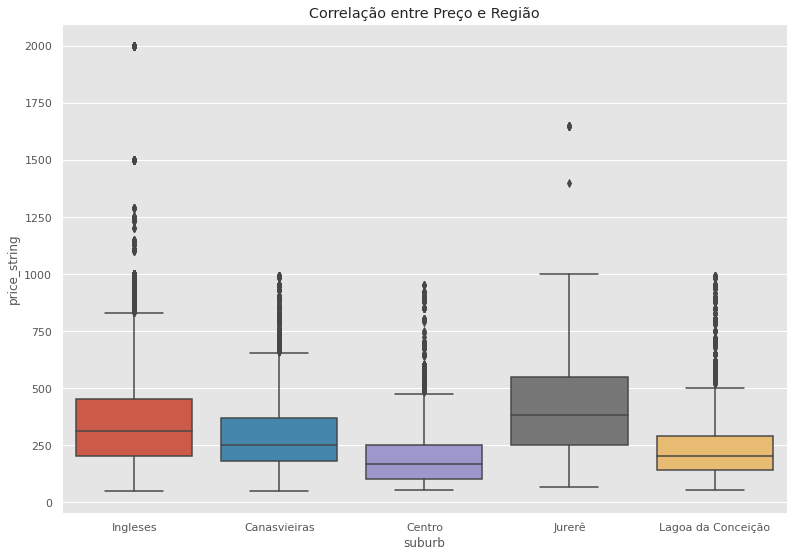

In [61]:
#Verificando correlações entre preço e região
grafico = sns.boxplot(data=df_datasalugadas, y='price_string', x='suburb')
grafico.set_title("Correlação entre Preço e Região")

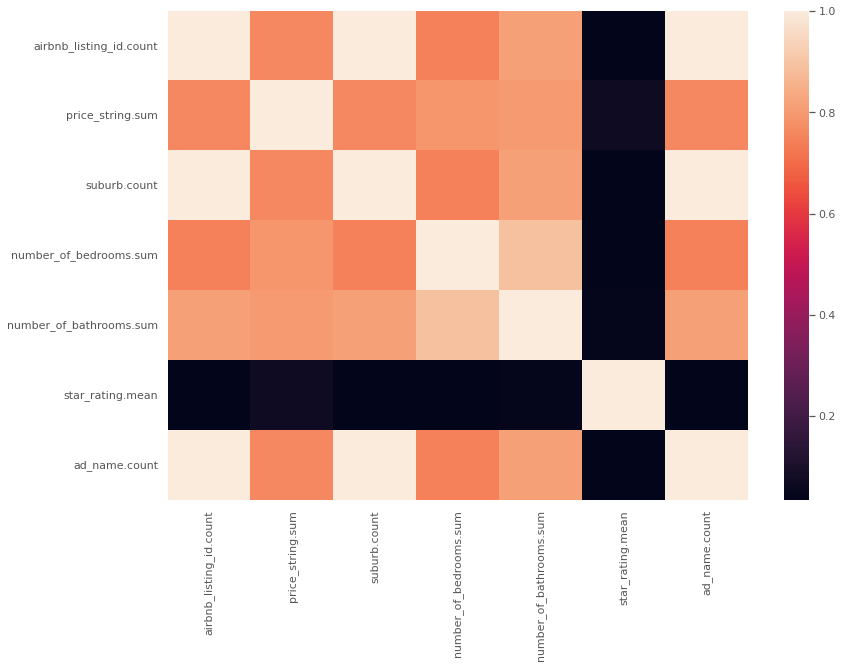

In [62]:
#Correlações com preços
sns.heatmap(df_3.corr())


##Antecedência média das reservas.
a. Esse número é maior ou menor para finais de semana?

In [63]:
df_datasalugadas.head()

,Unnamed: 0_x,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied,Unnamed: 0_y,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
12,12,6452,40206270,2021-01-01 00:00:00,2021-01-01,380.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0
13,13,6453,40206270,2021-01-01 00:00:00,2021-01-02,380.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0
52,52,6492,40206270,2021-02-10 00:00:00,2021-02-10,195.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0
53,53,6493,40206270,2021-02-10 00:00:00,2021-02-11,350.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0
54,54,6494,40206270,2021-02-10 00:00:00,2021-02-12,350.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0


In [64]:
#Verificando o typo de variável
df_datasalugadas.dtypes

Unnamed: 0_x                    int64
Unnamed: 0.1                    int64
airbnb_listing_id               int64
booked_on                      object
date                   datetime64[ns]
price_string                  float64
occupied                        int64
Unnamed: 0_y                    int64
suburb                         object
ad_name                        object
number_of_bedrooms            float64
number_of_bathrooms           float64
star_rating                   float64
is_superhost                     bool
number_of_reviews             float64
dtype: object

In [65]:
#Transformando booked_on em datetime
df_datasalugadas['booked_on'] = pd.to_datetime(df_datasalugadas['booked_on'])
df_datasalugadas.dtypes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Unnamed: 0_x                    int64
Unnamed: 0.1                    int64
airbnb_listing_id               int64
booked_on              datetime64[ns]
date                   datetime64[ns]
price_string                  float64
occupied                        int64
Unnamed: 0_y                    int64
suburb                         object
ad_name                        object
number_of_bedrooms            float64
number_of_bathrooms           float64
star_rating                   float64
is_superhost                     bool
number_of_reviews             float64
dtype: object

In [66]:
#Calculando a Antecedência de Reserva
df_datasalugadas['Antecedência de Reserva'] = df_datasalugadas['date'] - df_datasalugadas['booked_on']
df_datasalugadas['Antecedência de Reserva']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


12         0 days
13         1 days
52         0 days
53         1 days
54         2 days
           ...   
354508   184 days
354514   192 days
354517   195 days
354518   196 days
354519   117 days
Name: Antecedência de Reserva, Length: 140508, dtype: timedelta64[ns]

In [67]:
#Alterando o tipo da coluna Antecedência de Reserva, para que seja possivel a realização de cálculos.
df_datasalugadas['Antecedência de Reserva'] = df_datasalugadas['Antecedência de Reserva'].map(lambda x: x.components.days)
df_datasalugadas['Antecedência de Reserva']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


12          0
13          1
52          0
53          1
54          2
         ... 
354508    184
354514    192
354517    195
354518    196
354519    117
Name: Antecedência de Reserva, Length: 140508, dtype: int64

In [81]:
#Verificando Outliers
df_datasalugadas['Antecedência de Reserva'].describe(percentiles=[0.01,0.1,0.25,0.50,0.75,0.90,0.99])

count    140505.000000
mean         37.679449
std          67.640737
min           0.000000
1%            0.000000
10%           0.000000
25%           1.000000
50%          11.000000
75%          42.000000
90%          98.000000
99%         335.000000
max         370.000000
Name: Antecedência de Reserva, dtype: float64

In [69]:
#Ordenando a coluna em ordem crescente
df_datasalugadas['Antecedência de Reserva'].sort_values()


12           0
85443        0
85444        0
85446        0
85450        0
          ... 
120661     369
120662     370
76559     7622
302698    7644
238097    7644
Name: Antecedência de Reserva, Length: 140508, dtype: int64

In [70]:
#Trantando os Outliers
df_remove = df_datasalugadas.loc[(df_datasalugadas['Antecedência de Reserva'] > 371)]
df_datasalugadas = df_datasalugadas.drop(df_remove.index)
df_datasalugadas['Antecedência de Reserva'].sort_values()

12          0
85444       0
85446       0
85450       0
85451       0
         ... 
120659    367
50439     368
120660    368
120661    369
120662    370
Name: Antecedência de Reserva, Length: 140505, dtype: int64

In [71]:
print('A antecedência média das reservas é de:', round(df_datasalugadas['Antecedência de Reserva'].mean()),'dias.')

A antecedência média das reservas é de: 38 dias.


In [72]:
#Criando uma coluna com os dias da semana 
df_datasalugadas['day_of_week'] = df_datasalugadas['date'].dt.day_name()


In [73]:
#Limpando os dados para utilização apenas do que serão necessários 

df_mask = df_datasalugadas[['airbnb_listing_id','booked_on','date','price_string','occupied','suburb','Antecedência de Reserva','day_of_week']]
df_mask.head()

,airbnb_listing_id,booked_on,date,price_string,occupied,suburb,Antecedência de Reserva,day_of_week
12,40206270,2021-01-01,2021-01-01,380.0,1,Ingleses,0,Friday
13,40206270,2021-01-01,2021-01-02,380.0,1,Ingleses,1,Saturday
52,40206270,2021-02-10,2021-02-10,195.0,1,Ingleses,0,Wednesday
53,40206270,2021-02-10,2021-02-11,350.0,1,Ingleses,1,Thursday
54,40206270,2021-02-10,2021-02-12,350.0,1,Ingleses,2,Friday


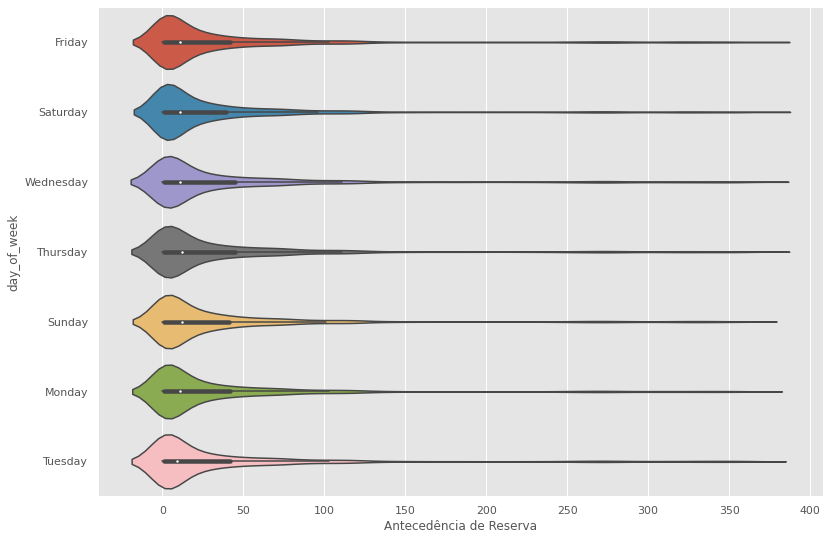

In [74]:
sns.violinplot(data=df_mask,y='day_of_week',x='Antecedência de Reserva')

In [82]:
df_4 = df_mask.groupby("day_of_week").agg({
      'Antecedência de Reserva': 'mean',
})
df_4['Antecedência de Reserva'] =  df_4['Antecedência de Reserva'].round(0)
df_4


,Antecedência de Reserva
day_of_week,
Friday,37.0
Monday,37.0
Saturday,36.0
Sunday,37.0
Thursday,39.0
Tuesday,37.0
Wednesday,39.0


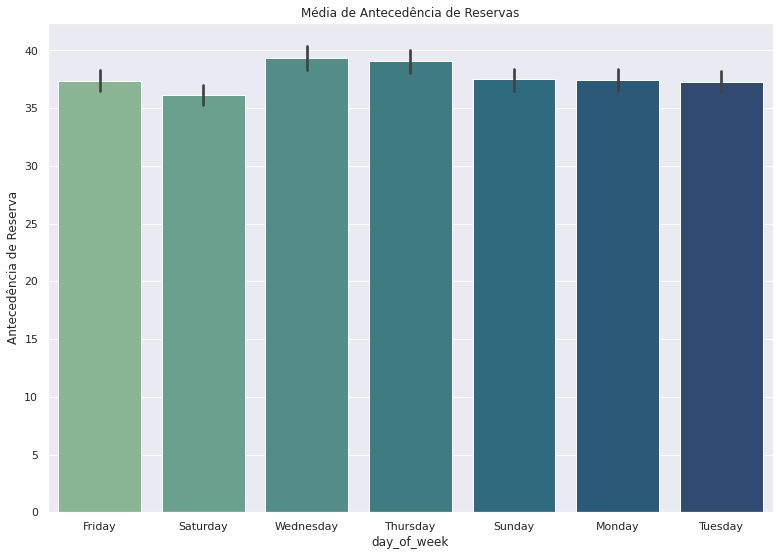

In [83]:
grafico3 = sns.barplot(data= df_mask, x='day_of_week',y= 'Antecedência de Reserva', palette='crest' )
sns.set(rc={'figure.figsize':(13,9)})
grafico3.set_title('Média de Antecedência de Reservas')  
plt.show(grafico3)